In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

In [44]:
togo_df = pd.read_csv("../data/togo.csv").set_index("Timestamp")
sierraleone_df = pd.read_csv("../data/sierraleone_clean.csv").set_index("Timestamp")
benin_df = pd.read_csv("../data/benin-malanville_clean.csv").set_index("Timestamp")

# Global Horizontal Irradiance Across Country

In [61]:
togo_ghi_df = togo_df[["GHI"]].copy()
togo_ghi_df["country"] = "Togo"
print(togo_ghi_df.head())
sierraleone_ghi_df = sierraleone_df[["GHI"]].copy()
sierraleone_ghi_df["country"] = "Sierra Leone"
print(sierraleone_ghi_df.head())
benin_ghi_df = benin_df[["GHI"]].copy()
benin_ghi_df["country"] = "Benin"
print(benin_ghi_df.head())

                     GHI country
Timestamp                       
2021-10-25 00:01:00 -1.3    Togo
2021-10-25 00:02:00 -1.3    Togo
2021-10-25 00:03:00 -1.3    Togo
2021-10-25 00:04:00 -1.2    Togo
2021-10-25 00:05:00 -1.2    Togo
                     GHI       country
Timestamp                             
2021-10-30 00:01:00 -0.7  Sierra Leone
2021-10-30 00:02:00 -0.7  Sierra Leone
2021-10-30 00:03:00 -0.7  Sierra Leone
2021-10-30 00:04:00 -0.7  Sierra Leone
2021-10-30 00:05:00 -0.7  Sierra Leone
                     GHI country
Timestamp                       
2021-08-09 00:01:00 -1.2   Benin
2021-08-09 00:02:00 -1.1   Benin
2021-08-09 00:03:00 -1.1   Benin
2021-08-09 00:04:00 -1.1   Benin
2021-08-09 00:05:00 -1.0   Benin


In [52]:
combined_ghi_df = pd.concat([togo_ghi_df, sierraleone_ghi_df, benin_ghi_df], axis=0)
combined_ghi_df.tail()

,GHI,country
Timestamp,,
2022-08-08 23:56:00,-5.5,Benin
2022-08-08 23:57:00,-5.5,Benin
2022-08-08 23:58:00,-5.5,Benin
2022-08-08 23:59:00,-5.5,Benin
2022-08-09 00:00:00,-5.5,Benin


<Axes: xlabel='country', ylabel='GHI'>

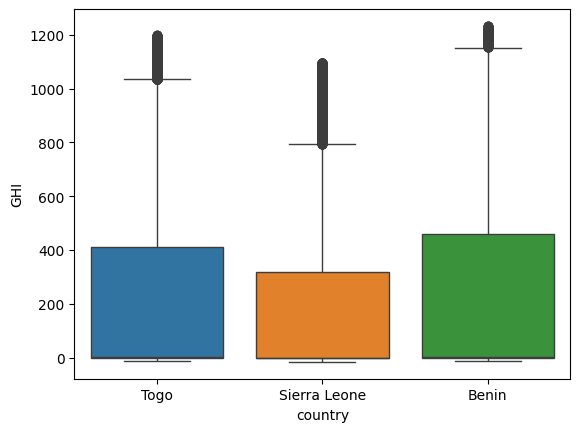

In [57]:
sns.boxplot( x= "country", y= "GHI" , data=combined_ghi_df , hue="country")

In [20]:
#togo
togo_df["GHI"].describe()

count    525600.000000
mean        219.956519
std         315.850423
min         -12.700000
25%          -2.200000
50%           2.100000
75%         412.900000
max        1198.000000
Name: GHI, dtype: float64

In [21]:
#benin
benin_df["GHI"].describe()

count    525600.000000
mean        232.782219
std         327.083885
min         -11.100000
25%          -2.000000
50%           1.800000
75%         459.700000
max        1233.000000
Name: GHI, dtype: float64

In [22]:
#sierraleone
sierraleone_df["GHI"].describe()

count    525600.000000
mean        179.274886
std         276.520057
min         -15.900000
25%          -2.700000
50%           0.300000
75%         316.700000
max        1097.000000
Name: GHI, dtype: float64

In [75]:

togo_ghi = togo_df["GHI"]
sierraleone_ghi = sierraleone_df["GHI"]
benin_ghi = benin_df["GHI"]

# Run one-way Kruskal–Wallis
f_stat, p_val = kruskal(togo_ghi, sierraleone_ghi, benin_ghi)

print("One-Way Kruskal–Wallis Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")


One-Way Kruskal–Wallis Results:
F-statistic: 6304.3113
P-value: 0.0000e+00


Text(0.5, 1.0, 'Average GHI comparsion')

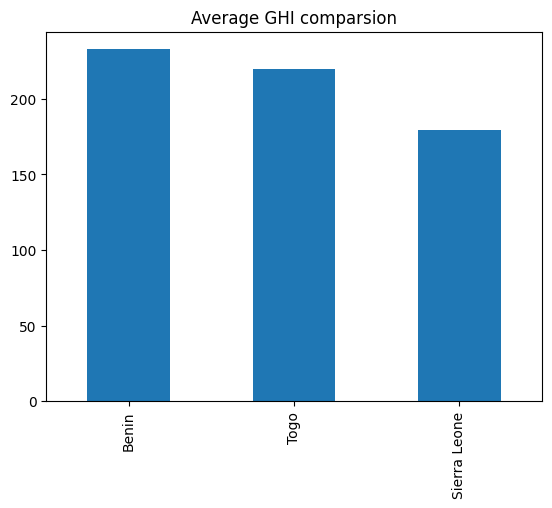

In [58]:
compare_GHI = [togo_df["GHI"].mean() , sierraleone_df["GHI"].mean()  , benin_df["GHI"].mean() ]
compare_GHI = pd.DataFrame(compare_GHI , index=["Togo" , "Sierra Leone" , "Benin"] , columns=["GHI"])
compare_GHI = compare_GHI.sort_values(by="GHI" , ascending=False)
compare_GHI.plot(kind="bar" , legend=False)
plt.title("Average GHI comparsion")

# Direct Normal Irradiance

In [62]:
togo_dni_df = togo_df[["DNI"]].copy()
togo_dni_df["country"] = "Togo"
print(togo_dni_df.head())
sierraleone_dni_df = sierraleone_df[["DNI"]].copy()
sierraleone_dni_df["country"] = "Sierra Leone"
print(sierraleone_dni_df.head())
benin_dni_df = benin_df[["DNI"]].copy()
benin_dni_df["country"] = "Benin"
print(benin_dni_df.head())

                     DNI country
Timestamp                       
2021-10-25 00:01:00  0.0    Togo
2021-10-25 00:02:00  0.0    Togo
2021-10-25 00:03:00  0.0    Togo
2021-10-25 00:04:00  0.0    Togo
2021-10-25 00:05:00  0.0    Togo
                     DNI       country
Timestamp                             
2021-10-30 00:01:00 -0.1  Sierra Leone
2021-10-30 00:02:00 -0.1  Sierra Leone
2021-10-30 00:03:00 -0.1  Sierra Leone
2021-10-30 00:04:00  0.0  Sierra Leone
2021-10-30 00:05:00 -0.1  Sierra Leone
                     DNI country
Timestamp                       
2021-08-09 00:01:00 -0.2   Benin
2021-08-09 00:02:00 -0.2   Benin
2021-08-09 00:03:00 -0.2   Benin
2021-08-09 00:04:00 -0.1   Benin
2021-08-09 00:05:00 -0.1   Benin


In [63]:
combined_dni_df = pd.concat([togo_dni_df, sierraleone_dni_df, benin_dni_df], axis=0)
combined_dni_df.tail()

,DNI,country
Timestamp,,
2022-08-08 23:56:00,-0.1,Benin
2022-08-08 23:57:00,-0.1,Benin
2022-08-08 23:58:00,-0.1,Benin
2022-08-08 23:59:00,-0.1,Benin
2022-08-09 00:00:00,-0.1,Benin


<Axes: xlabel='country', ylabel='DNI'>

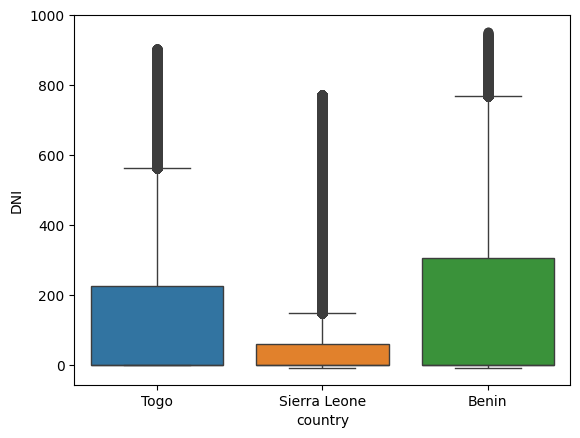

In [65]:
sns.boxplot(x= "country", y= "DNI" , data=combined_dni_df , hue="country")

In [34]:
#togo
togo_df["DNI"].describe()

count    525600.000000
mean        145.371431
std         246.264222
min           0.000000
25%           0.000000
50%           0.000000
75%         225.200000
max         904.100000
Name: DNI, dtype: float64

In [35]:
#benin
benin_df["DNI"].describe()

count    525600.000000
mean        164.437476
std         260.921667
min          -7.800000
25%          -0.500000
50%          -0.100000
75%         307.000000
max         952.300000
Name: DNI, dtype: float64

In [36]:
#sierraleone
sierraleone_df["DNI"].describe()

count    525600.000000
mean        100.898163
std         198.638232
min          -7.800000
25%          -0.300000
50%          -0.100000
75%          59.400000
max         772.300000
Name: DNI, dtype: float64

In [76]:
togo_dni= togo_df["DNI"]
sierraleone_dni = sierraleone_df["DNI"]
benin_dni = benin_df["DNI"]

# Run one-way Kruskal–Wallis
f_stat, p_val = kruskal(togo_dni, sierraleone_dni, benin_dni)

print("One-Way Kruskal–Wallis Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")


One-Way Kruskal–Wallis Results:
F-statistic: 105487.2313
P-value: 0.0000e+00


# Diffuse Horizontal Irradiance

In [66]:
togo_dhi_df = togo_df[["DHI"]].copy()
togo_dhi_df["country"] = "Togo"
print(togo_dhi_df.head())
sierraleone_dhi_df = sierraleone_df[["DHI"]].copy()
sierraleone_dhi_df["country"] = "Sierra Leone"
print(sierraleone_dhi_df.head())
benin_dhi_df = benin_df[["DHI"]].copy()
benin_dhi_df["country"] = "Benin"
print(benin_dhi_df.head())

                     DHI country
Timestamp                       
2021-10-25 00:01:00  0.0    Togo
2021-10-25 00:02:00  0.0    Togo
2021-10-25 00:03:00  0.0    Togo
2021-10-25 00:04:00  0.0    Togo
2021-10-25 00:05:00  0.0    Togo
                     DHI       country
Timestamp                             
2021-10-30 00:01:00 -0.8  Sierra Leone
2021-10-30 00:02:00 -0.8  Sierra Leone
2021-10-30 00:03:00 -0.8  Sierra Leone
2021-10-30 00:04:00 -0.8  Sierra Leone
2021-10-30 00:05:00 -0.8  Sierra Leone
                     DHI country
Timestamp                       
2021-08-09 00:01:00 -1.1   Benin
2021-08-09 00:02:00 -1.1   Benin
2021-08-09 00:03:00 -1.1   Benin
2021-08-09 00:04:00 -1.0   Benin
2021-08-09 00:05:00 -1.0   Benin


In [67]:
combined_dhi_df = pd.concat([togo_dhi_df, sierraleone_dhi_df, benin_dhi_df], axis=0)
combined_dhi_df.tail()

,DHI,country
Timestamp,,
2022-08-08 23:56:00,-5.9,Benin
2022-08-08 23:57:00,-5.8,Benin
2022-08-08 23:58:00,-5.8,Benin
2022-08-08 23:59:00,-5.8,Benin
2022-08-09 00:00:00,-5.7,Benin


<Axes: xlabel='country', ylabel='DHI'>

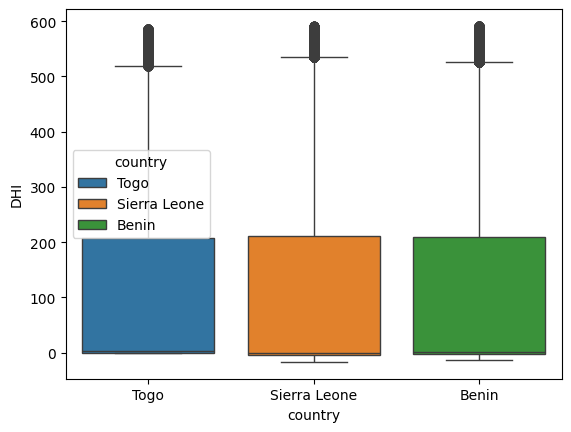

In [69]:
sns.boxplot(x= "country", y= "DHI" , data=combined_dhi_df , hue="country" , legend=True)

In [40]:
#togo
togo_df["DHI"].describe()

count    525600.000000
mean        110.840206
std         150.930197
min           0.000000
25%           0.000000
50%           2.500000
75%         207.700000
max         586.000000
Name: DHI, dtype: float64

In [41]:
#benin
benin_df["DHI"].describe()

count    525600.000000
mean        110.035783
std         152.545413
min         -12.600000
25%          -2.100000
50%           1.600000
75%         209.000000
max         591.400000
Name: DHI, dtype: float64

In [42]:
#sierraleone
sierraleone_df["DHI"].describe()

count    525600.000000
mean        104.750275
std         152.448886
min         -16.700000
25%          -3.800000
50%          -0.100000
75%         211.600000
max         590.500000
Name: DHI, dtype: float64

In [77]:
togo_DHI= togo_df["DHI"]
sierraleone_DHI = sierraleone_df["DHI"]
benin_DHI = benin_df["DHI"]

# Run one-way Kruskal–Wallis
f_stat, p_val = kruskal(togo_DHI, sierraleone_DHI, benin_DHI)

print("One-Way Kruskal–Wallis Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")


One-Way Kruskal–Wallis Results:
F-statistic: 75282.4407
P-value: 0.0000e+00
